In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
image_path = "/Users/chaoxu/code/local-spark/Data/image_qiancheng"
ratio = 0.09
model = 'tree'
version = '6v1.0sm'

In [3]:
df = pd.read_csv("/Users/chaoxu/code/local-spark/Data/qiancheng_data/qiancheng_sample_new_merge_{0}/data.csv".format(ratio))

/Users/chaoxu/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,20,67,71) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.columns

Index([u'maxent_id', u'cracked.anomaly', u'cracked.value', u'did.15m.anomaly',
       u'did.15m.value', u'did.1d.anomaly', u'did.1d.value', u'did.1h.anomaly',
       u'did.1h.value', u'did.1m.anomaly', u'did.1m.value', u'did.5m.anomaly',
       u'did.5m.value', u'did.6h.anomaly', u'did.6h.value', u'did.7d.anomaly',
       u'did.7d.value', u'event_id', u'event_type', u'idcIP.anomaly',
       u'idcIP.value', u'ipGeo', u'ipGeo.15m.anomaly', u'ipGeo.15m.value',
       u'ipGeo.1d.anomaly', u'ipGeo.1d.value', u'ipGeo.1h.anomaly',
       u'ipGeo.1h.value', u'ipGeo.1m.anomaly', u'ipGeo.1m.value',
       u'ipGeo.5m.anomaly', u'ipGeo.5m.value', u'ipGeo.6h.anomaly',
       u'ipGeo.6h.value', u'ipGeo.7d.anomaly', u'ipGeo.7d.value', u'ipSeg24',
       u'ipSeg24.15m.anomaly', u'ipSeg24.15m.value', u'ipSeg24.1d.anomaly',
       u'ipSeg24.1d.value', u'ipSeg24.1h.anomaly', u'ipSeg24.1h.value',
       u'ipSeg24.1m.anomaly', u'ipSeg24.1m.value', u'ipSeg24.5m.anomaly',
       u'ipSeg24.5m.value', u'ipSeg2

In [5]:
df.dtypes

maxent_id               object
cracked.anomaly        float64
cracked.value           object
did.15m.anomaly        float64
did.15m.value          float64
did.1d.anomaly         float64
did.1d.value           float64
did.1h.anomaly         float64
did.1h.value           float64
did.1m.anomaly         float64
did.1m.value           float64
did.5m.anomaly         float64
did.5m.value           float64
did.6h.anomaly         float64
did.6h.value           float64
did.7d.anomaly         float64
did.7d.value           float64
event_id                object
event_type              object
idcIP.anomaly          float64
idcIP.value             object
ipGeo                   object
ipGeo.15m.anomaly      float64
ipGeo.15m.value        float64
ipGeo.1d.anomaly       float64
ipGeo.1d.value         float64
ipGeo.1h.anomaly       float64
ipGeo.1h.value         float64
ipGeo.1m.anomaly       float64
ipGeo.1m.value         float64
                        ...   
maxentID.1d.anomaly    float64
maxentID

In [6]:
df.loc[df.os == "ios"]['os'].count()

11277

In [7]:
df.loc[df.os == "android"]['os'].count()

17292

In [8]:
df['os'].unique()

array(['ios', 'android'], dtype=object)

In [9]:
df[['label']]=df[['label']].fillna(0)

In [10]:
from Pic.maxent_style import maxent_style
from Pic.maxent_font import tick_font

In [14]:
@maxent_style
def label_time(df,_path,palette=None):
    df["timestamp"] = pd.to_datetime(df['timestamp'], unit='ms', utc=True)
    df["timestamp"] = pd.DatetimeIndex(df["timestamp"]) + timedelta(hours=8)
    df = df.sort_values(by="timestamp")
    df_label = df[["timestamp","label"]]
    df_label = df_label.set_index("timestamp")
    df_label_1 = df_label.where(df_label["label"] == 1).resample("H").count()
    df_label_0 = df_label.where(df_label["label"] == 0).resample("H").count()
    fig, axes = plt.subplots(dpi=600)
    tick_font(axes,font_size="x-small",rotation=90)
    axes.plot_date(df_label_0.index,df_label_0.values, color=next(palette), fmt="-", label="label 0")
    axes.plot_date(df_label_1.index,df_label_1.values, color=next(palette), fmt="-", label="label 1")
    axes.legend(loc='upper right')
    fig = plt.gcf()
    fig.savefig(_path,format='png')
    plt.show()

label_time


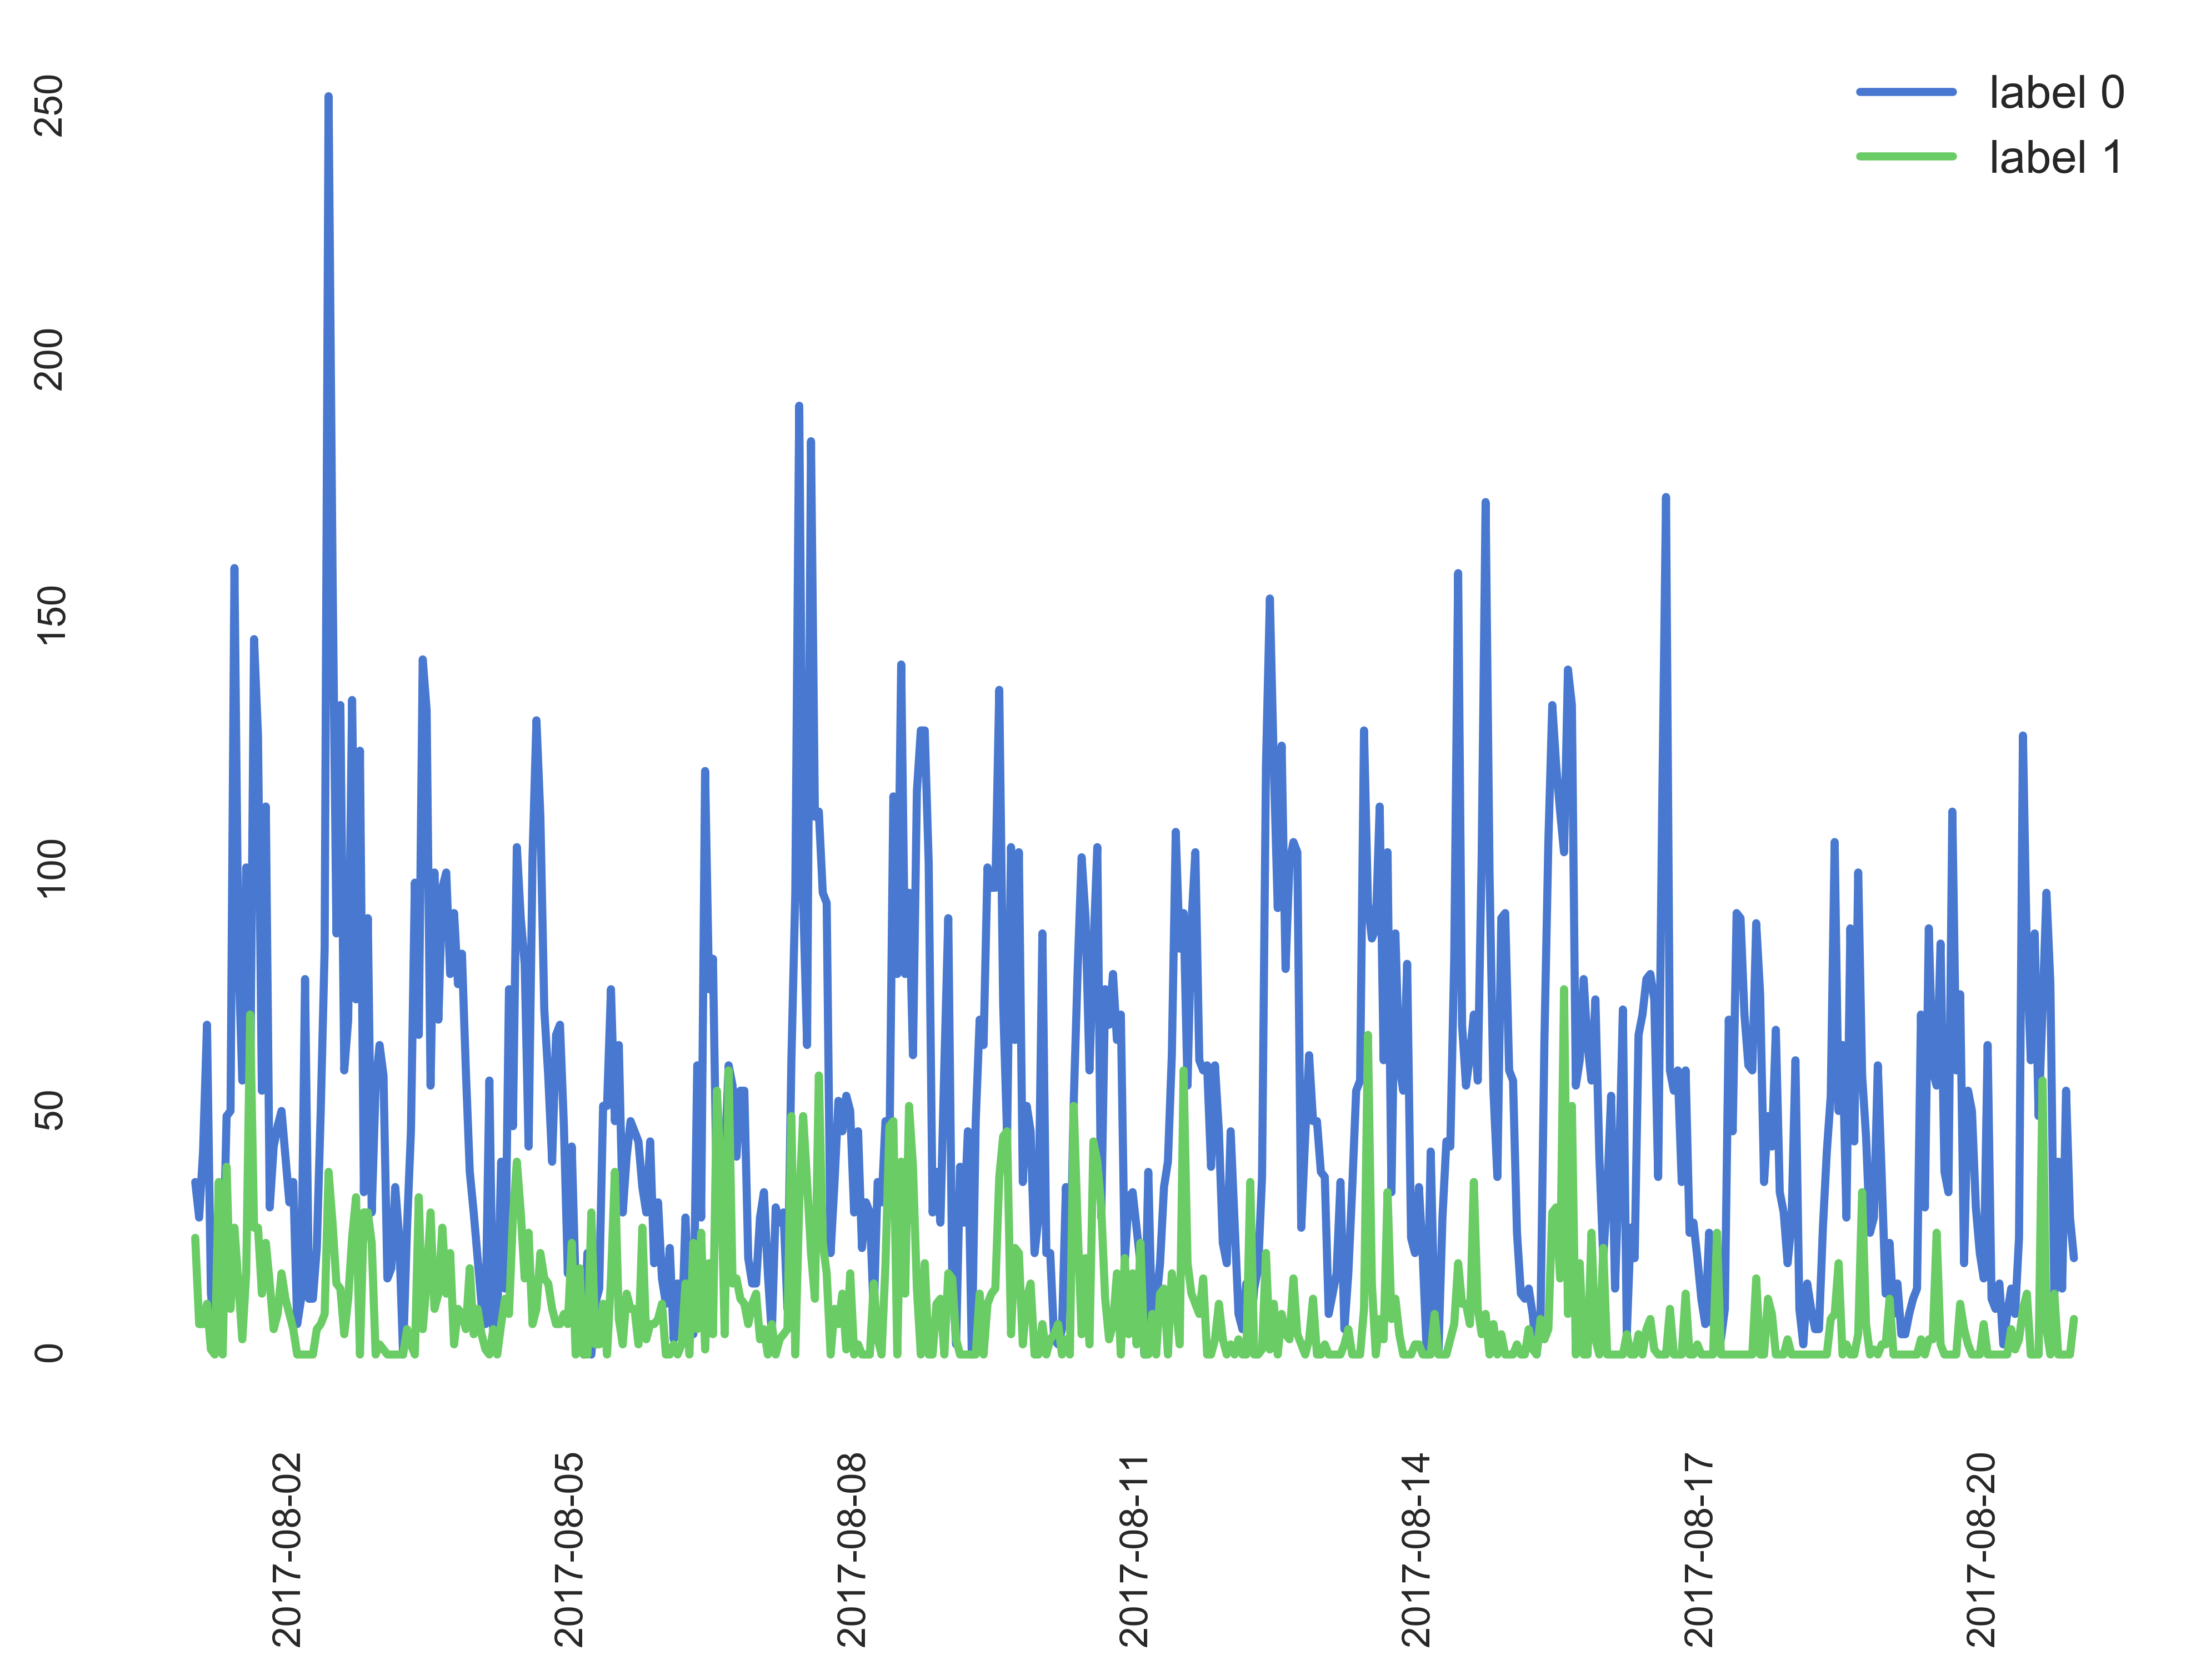

In [15]:
save_path = image_path + "/label_vs_time-{0}-{1}-{2}.png".format(version,ratio,model)
label_time(df,save_path)

In [ ]:
df.label.value_counts(normalize=True).plot(kind='bar')
plt.show()

In [ ]:
df.label.value_counts(normalize=True)

In [ ]:
df.label.value_counts()

In [ ]:
df.maxent_id.loc[df.label == 0].drop_duplicates().count()

In [ ]:
df.maxent_id.loc[df.label == 1].drop_duplicates().count()

In [ ]:
X = df.ix[:, df.columns != 'label']
y = df.ix[:, df.columns == 'label']

In [ ]:
Cat_Colums = X.dtypes.pipe(lambda X: X[X=='object']).index

In [ ]:
Cat_Colums

In [ ]:
one_zro_cols = ['cracked.value','proxyIP.value','uaMismatch.value']
for i in one_zro_cols:
    print "cos is {0}".format(i)
    print df[i].value_counts(normalize=True)
    print "\n"
    print "label = 0 cos is {0}".format(i)
    print df[i].loc[df.label ==0].value_counts(normalize=True)
    print "\n"
    print "label = 1 cos is {0}".format(i)
    print df[i].loc[df.label ==1].value_counts(normalize=True)
    print "-------------\n"

In [ ]:
import re
anormaly = re.compile('.*anomaly$')
anormaly_match = np.vectorize(lambda x:bool(anormaly.match(x)))
anormaly_cols = df.columns.values[anormaly_match(df.columns.values)]

In [ ]:
for col in anormaly_cols:
#     print "label = 0 --> col is {0} \n".format(col)
    df0_desc = df.loc[df.label == 0][col].describe(percentiles=[.05,.1,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95])
#     print "label = 1 --> col is {0} \n".format(col)
    df1_desc = df.loc[df.label == 1][col].describe(percentiles=[.05,.1,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95])
    df_diff = df0_desc - df1_desc
    print "sub 0 vs 1 of {0}".format(col)
    print df_diff
    df_diff = df_diff.drop(['count','mean','std','min','max']).abs()
    row_name = df_diff.idxmax()
    print "!!!max Percentile Values from {0}".format(row_name)
    print "-----\n"

In [ ]:
count_ = re.compile('.*counts$')
count_match = np.vectorize(lambda x:bool(count_.match(x)))
count_cols = df.columns.values[count_match(df.columns.values)]

In [ ]:
for col in count_cols:
#     print "label = 0 --> col is {0} \n".format(col)
    df0_desc = df.loc[df.label == 0][col].describe(percentiles=[.05,.1,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95])
#     print "label = 1 --> col is {0} \n".format(col)
    df1_desc = df.loc[df.label == 1][col].describe(percentiles=[.05,.1,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95])
    df_diff = df0_desc - df1_desc
    print "sub 0 vs 1 of {0}".format(col)
    print df_diff
    df_diff = df_diff.drop(['count','mean','std','min','max']).abs()
    row_name = df_diff.idxmax()
    print "!!!max Percentile Values from {0}".format(row_name)
    print "-----\n"

In [ ]:
import seaborn as sns
sns.set(font_scale=3.0)
fig,ax= plt.subplots(figsize=(60,60))
# fig,ax= plt.subplots(dpi=400)
X_anormaly = X[anormaly_cols]
df_anormaly = pd.concat([X_anormaly,y],axis=1)
# sns.heatmap(df_anormaly.corr(),ax=ax)
sns.heatmap(df_anormaly.corr(),ax=ax,annot=True,fmt='.1f')
plt.show()

In [ ]:

fig,ax= plt.subplots(figsize=(60,60))
# fig,ax= plt.subplots(dpi=400)
df_anormaly_0 = df.loc[df.label ==0][anormaly_cols]
# sns.heatmap(df_anormaly.corr(),ax=ax)
sns.heatmap(df_anormaly_0.corr(),ax=ax,annot=True,fmt='.1f')
plt.show()

In [ ]:
fig,ax= plt.subplots(figsize=(60,60))
# fig,ax= plt.subplots(dpi=400)
df_anormaly_1 = df.loc[df.label == 1][anormaly_cols]
# sns.heatmap(df_anormaly.corr(),ax=ax)
sns.heatmap(df_anormaly_1.corr(),ax=ax,annot=True,fmt='.1f')
plt.show()

In [ ]:
# float_cols = X.dtypes.pipe(lambda X: X[X=='float']).index
# pic_nums = float_cols.shape[0]
# import matplotlib.gridspec as gridspec
# import seaborn as sns
# plt.figure(figsize=(12,28*4))
# gs = gridspec.GridSpec(pic_nums, 1)
# for i, cn in enumerate(df[float_cols]):
#     print("cn",i,cn)
#     ax = plt.subplot(gs[i])
#     sns.distplot(df[cn][df.label == 1], bins=5)
#     sns.distplot(df[cn][df.label == 0], bins=5)
#     ax.set_xlabel('')
#     ax.set_title('histogram of feature: ' + str(cn))
# plt.show()

In [ ]:
fig,ax= plt.subplots(figsize=(60,60))
X_count = df[count_cols]
df_count = pd.concat([X_count,y],axis=1)
sns.heatmap(df_count.corr(),ax=ax,annot=True,fmt='.1f')
plt.show()

In [ ]:
fig,ax= plt.subplots(figsize=(60,60))
df_count_0 = df[count_cols].loc[df.label == 0]
# X_count_0 = df_count_0.ix[:, df_count_0.columns != 'label']
# y_count_0 = df_count_0.ix[:, df_count_0.columns == 'label']
# df_count = pd.concat([X_count_0,y_count_0],axis=1)
sns.heatmap(df_count_0.corr(),ax=ax,annot=True,fmt='.1f')
plt.show()

In [ ]:
fig,ax= plt.subplots(figsize=(60,60))
df_count_1 = df[count_cols].loc[df.label == 1]
# X_count_0 = df_count_0.ix[:, df_count_0.columns != 'label']
# y_count_0 = df_count_0.ix[:, df_count_0.columns == 'label']
# df_count = pd.concat([X_count_0,y_count_0],axis=1)
sns.heatmap(df_count_1.corr(),ax=ax,annot=True,fmt='.1f')
plt.show()